In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

from matplotlib.textpath import TextPath
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

import IPython.display as ipd
from scipy.io import wavfile
from echohiding import echo_hide, extract_echo_bits
from audioutils import get_odg_distortion, get_mp3_encoded
from binutils import *

In [ ]:
# Load audio samples from a randomly chosen example from OpenMic Dataset
sr, x = wavfile.read("086799_0.wav")
x = np.mean(x, axis=1) # Mix to mono
x = x/32768 # Put in range [-1, 1]
ipd.Audio(x, rate=sr)

Payload: 43 bits per second


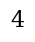

In [3]:
# Make a binary image of the number 4
np.random.seed(0)
n_bits = 420
N = int(n_bits**0.5)
b = text2binimg("4", N).flatten()

# Choose window length for echoes.  Higher window lengths
# may lead to more robust encoding, but at a lower bitrate
L = 1024
print("Payload: {} bits per second".format(sr//L))

In [ ]:
# Hide echoes. A higher alpha will make the echoes more obvious
y = echo_hide(x, L, b, alpha=0.2)
ipd.Audio(y, rate=sr)

Bit error rate wav encode: 0.052
Bit error rate 64kbps mp3: 0.075


Text(0.5, 1.0, 'Mp3 Encoded 64kpbs 7.50% Bit Error')

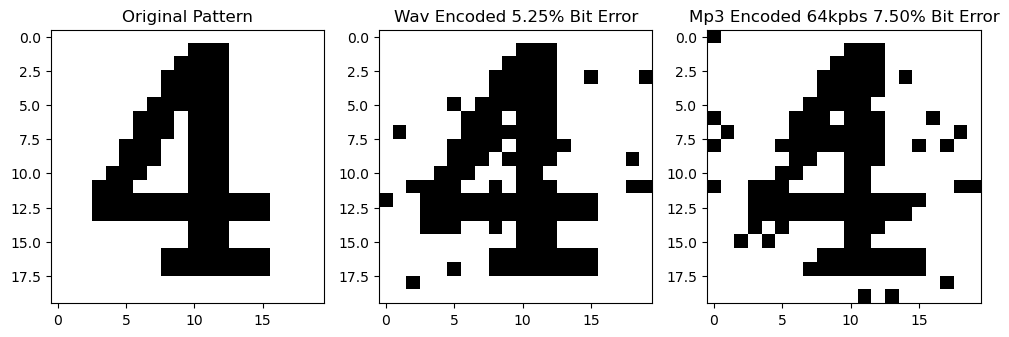

In [5]:
# Robustness
b_est = extract_echo_bits(y, L)
berr = 1-np.sum(b==b_est)/b.size
print("Bit error rate wav encode: {:.3f}".format(berr))

# Robustness
bitrate = 64
b_est_mp3 = extract_echo_bits(get_mp3_encoded(y, sr, bitrate), L)
berr_mp3 = 1-np.sum(b==b_est_mp3)/b.size
print("Bit error rate {}kbps mp3: {:.3f}".format(bitrate, berr_mp3))

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(b.reshape(N, N), cmap='gray')
plt.title("Original Pattern")
plt.subplot(132)
plt.imshow(b_est.reshape(N, N), cmap='gray')
plt.title("Wav Encoded {:.2f}% Bit Error".format(100*berr))
plt.subplot(133)
plt.imshow(b_est_mp3.reshape(N, N), cmap='gray')
plt.title("Mp3 Encoded {}kpbs {:.2f}% Bit Error".format(bitrate, 100*berr_mp3))

In [6]:
# Imperceptibility (using Holters GstPEAQ)
odg, di = get_odg_distortion(x, y, sr)
print("Objective difference grade: {:.3f}".format(odg))
print("Distortion index: {:.3f}".format(di))

Objective difference grade: -2.420
Distortion index: -0.526
